# Importazione librerie e setup

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
path = './data/'
#meteo_21 = pd.read_parquet(f'{path}/data_meteo/Dati_sensori_meteo_2021.parquet')
#meteo_21.head()

# Conversione files e Importazione datasets

## Convesione da `.csv` a `.parquet`

Data la grande dimensione di alcuni dei dataset utilizzati, questi verranno convertiti da `.csv` a `.parquet` (Apache Parquet Format)

In [4]:
#df = pd.read_csv('./Datasets/Dati_sensori_meteo_2021.csv', low_memory=False)
#df.to_parquet('./Datasets/Dati_sensori_meteo_2021.parquet')

## Dataset Meteo - rilevazioni

### Attributi

- IdSensore: 
    - Tipologia: Testo normale
- Data: 
    - Data e ora, Marcatura oraria flessibile
- Valore: 
    - Tipologia: numero
    - Legenda: 9999 = dato mancante 888, 8888 = direzione vento variabile 777, 7777 = calma (solo per direzione di vento)
- idOperatore	
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 3: Valore massimo 4: Valore cumulato (per la pioggia)
    - Testo normale
- Stato	
    - LEGENDA: VA, VV = dato valido NA, NV, NC = dato invalido NI = dato incerto ND = dato non disponibile
    - Testo normale

### Read_csv

## Dataset Meteo - sensori

### Attributi

- **IdSensore**
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di meteo_21
    - Testo normale
- **Tipologia**
    - Grandezza misurata
    - Testo normale
- **Unità DiMisura**
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione

### Caratteristiche

Sono disponibili i dati delle grandezze:
- Livello Idrometrico (cm)
- Altezza neve (cm)
- Precipitazione (mm)
- Temperatura (°C)
- Umidità Relativa (%)
- Radiazione Globale (W/m2)
- Velocità e Direzione Vento (m/s e gradi).
- Velocità e direzione del vento (m/s e gradi N) raffica
NB: l’orario del dato è "ora solare" e si riferisce alle osservazioni ottenute fino all’orario indicato.

### Read_csv

In [5]:
#sensori_meteo = pd.read_csv(f'{path}Stazioni_Meteorologiche.csv', dtype = {'Tipologia': 'category'})
#sensori_meteo.head()
#stazioni_meteo['Tipologia'].value_counts()

## Dataset Qualità dell'aria - rilevazioni

### Attributi

- **IdSensore**: 
    - Identificativo Univoco che distingue il sensore
    - Tipologia: Testo normale
- **Data**: 
    - Data e ora, Marcatura oraria flessibile
    - I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
- **Valore**: 
    - Tipologia: numero
    - LEGENDA:-9999 = dato mancante o invalido
- **idOperatore**
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 
    - In realtà: I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
    - Testo normale
- **Stato**	
    - VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura.
    - Testo normale

### Caratteristiche

- La rete di rilevamento della qualità dell’aria di ARPA Lombardia è costituita da stazioni fisse che, per mezzo di analizzatori automatici, forniscono dati in continuo ad intervalli temporali regolari. 
- Le specie di inquinanti monitorate in continuo sono NOX, SO2, CO, O3, PM10, PM2.5 e benzene. A seconda del contesto ambientale nel quale è attivo il monitoraggio, diversa è la tipologia di inquinanti che è necessario rilevare. Pertanto, non tutte le stazioni sono dotate della medesima strumentazione analitica. 
- Le postazioni regionali sono distribuite su tutto il territorio regionale in funzione della densità abitativa e della tipologia di territorio rispettando i criteri definiti dal D.Lgs. 155/2010.
- **I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.**

### Reading

In [4]:
aria_dict = {} #creo dizionario che contiene tutti i dataframe per l'aria

# Prendere qualche giorno prima e qualche giorno dopo degli anni considerati cosi da avere valori attendibili delle medie mobili agli estremi

In [5]:
aria_dict['aria96_00'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_1996_2000.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria96_00'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [6]:
# Importazione Dataset da 2001 a 2014
aria_dict['aria01_04'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2001_2004.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria01_04'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [7]:
# Importazione Dataset da 2001 a 2016
aria_dict['aria05_07'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2005_2007.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria05_07'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [8]:
# Importazione Dataset da 2008 a 2010
aria_dict['aria08_10'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2008_2010.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria08_10'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [9]:
# Converto in importazione i -9999 in NA
aria_dict['aria11'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2011.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria11'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [10]:
# Converto in importazione i -9999 in NA
aria_dict['aria12'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2012.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria12'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [11]:
# Converto in importazione i -9999 in NA
aria_dict['aria13'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2013.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria13'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [12]:
# Converto in importazione i -9999 in NA
aria_dict['aria14'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2014.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria14'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [13]:
# Converto in importazione i -9999 in NA
aria_dict['aria15'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2015.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria15'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [14]:
# Converto in importazione i -9999 in NA
aria_dict['aria16'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2016.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria16'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [15]:
# Converto in importazione i -9999 in NA
aria_dict['aria17'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2017.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria17'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [16]:
# Converto in importazione i -9999 in NA
aria_dict['aria18'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2018.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria18'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [17]:
# Converto in importazione i -9999 in NA
aria_dict['aria19'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2019.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria19'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [18]:
# Converto in importazione i -9999 in NA
aria_dict['aria20'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2020.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria20'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [19]:
# Converto in importazione i -9999 in NA
aria_dict['aria21'] = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2021.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_dict['aria21'].dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

### Concatenazione

In [20]:
aria_tot = pd.concat(aria_dict).reset_index(drop=True)
aria_tot

,IdSensore,Data,Valore,Stato,idOperatore
0,5504,1996-01-01 00:00:00,61.0,VA,1
1,5505,1996-01-01 00:00:00,61.0,VA,1
2,5506,1996-01-01 00:00:00,53.9,VA,1
3,5531,1996-01-01 00:00:00,69.2,VA,1
4,5542,1996-01-01 00:00:00,61.0,VA,1
...,...,...,...,...,...
98291917,10331,2021-12-19 03:00:00,45.7,VA,1
98291918,10333,2021-12-24 19:00:00,39.8,VA,1
98291919,10331,2021-12-20 18:00:00,27.6,VA,1
98291920,10333,2021-12-25 11:00:00,84.7,VA,1


## Dataset Qualità dell'aria - sensori

### Attributi

- IdSensore
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di aria_21
    - Testo normale
- NomeTipoSensore	
    - Grandezza misurata
    - Testo normale
- Unità DiMisura	
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione

### Read_csv

In [21]:
sensori_aria = pd.read_csv(f'{path}Stazioni_qualita_dell_aria.csv',
                           parse_dates=['DataStart', 'DataStop'])
sensori_aria.tail()

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
961,6606,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,1991-11-20,2000-01-27,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
962,6382,Ossidi di Azoto,µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,N,1993-01-11,NaT,5113078,567173,46.167967,9.870144,"(46.16796681227828, 9.87014407497457)"
963,6607,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,2000-07-09,2002-04-04,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
964,20523,Ammoniaca,µg/m³,583,Bergamo v.Meucci,249.0,BG,Bergamo,N,NaT,NaT,5059922,550116,45.691037,9.643651,"(45.69103740547214, 9.643650579461385)"
965,12597,Cadmio,ng/m³,609,Casirate d'Adda v. Cimitero,108.0,BG,Casirate d'Adda,N,2008-04-24,NaT,5038450,543458,45.498227,9.556232,"(45.49822713394494, 9.556232262351761)"


In [22]:
sensori_aria.dtypes

IdSensore                   int64
NomeTipoSensore            object
UnitaMisura                object
Idstazione                  int64
NomeStazione               object
Quota                     float64
Provincia                  object
Comune                     object
Storico                    object
DataStart          datetime64[ns]
DataStop           datetime64[ns]
Utm_Nord                    int64
UTM_Est                     int64
lat                       float64
lng                       float64
location                   object
dtype: object

## Dataset Zonizzazione

In [23]:
zonizzazione = pd.read_csv(f'{path}zonizzazione/zonizzazione_ABCD.csv')
zonizzazione.head()

,Provincia,Codice Istat,Comune,Zona,Residenti 2008,Superficie (ha)
0,BG,16009,AMBIVERE,A,2341,327
1,BG,16013,ARZAGO D'ADDA,A,2836,944
2,BG,16018,BAGNATICA,A,4119,639
3,BG,16020,BARIANO,A,4396,714
4,BG,16021,BARZANO',A,5178,356


# Data Exploration e Data Cleansing (*superset*)

## Data Exploration

- verificare quali siano tutte le quantità uniche rilevate dai sensori qualità dell'aria
- quali siano i gruppi di inquinanti principali
- quali siano i limiti di assunzione umana (gionralieri e annuali)
    - Vedi [qui](https://www.arpalombardia.it/Pages/Aria/Inquinanti.aspx) per limiti e piccola descrizione
    - Vedi [qui](https://www.regione.lombardia.it/wps/portal/istituzionale/HP/DettaglioRedazionale/servizi-e-informazioni/cittadini/salute-e-prevenzione/Sicurezza-negli-ambienti-di-vita-e-di-lavoro/inquinamento-atmosferico/inquinamento-atmosferico/) per approfondimento

Determino il numero di sensori per ogni tipologia

- Si potrebbero considerare solo gli inquinanti **più importanti e con più stazioni**
- Ovvero **Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo**
- Facoltativi perchè non presenti nella valutazione della qualità dell'aria [qui](https://www.arpalombardia.it/Pages/Aria/Modellistica/Indice-qualit%C3%A0-aria.aspx): Monossido di carbonio e benzene

In [24]:
sensori_aria['NomeTipoSensore'].value_counts()

Ossidi di Azoto               166
Biossido di Azoto             166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Arsenico                       15
Benzo(a)pirene                 15
Nikel                          15
Piombo                         15
Cadmio                         15
Ammoniaca                      14
BlackCarbon                     4
PM10                            4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

Determino il numero di zone in cui é suddiviso il territorio Lombardo

In [25]:
zonizzazione['Zona'].value_counts()

B         448
C         423
A         406
AGG MI    107
C D       102
AGG BG     37
AGG BS     20
D           2
Name: Zona, dtype: int64

## Data Cleansing

### Rimozione righe mancanti

In [26]:
#aria_tot['Stato'].value_counts(dropna = False)  #commentato perche lento (il numero di na lo si vede nel blocco sotto)

In [27]:
print(aria_tot['Valore'].isna().sum(), '  Numero righe con valori invalidi')
print(len(aria_tot), 'Numero righe totali')
print(round(aria_tot['Valore'].isna().sum()/len(aria_tot)*100, 2), '%   Percentuale righe con valori invalidi')

10800557   Numero righe con valori invalidi
98291922 Numero righe totali
10.99 %   Percentuale righe con valori invalidi


- L'invalidità del dato è descritta sia dall'attributo `Stato` che dalla presenza di NaN in `Valore`
- MA (VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura)

In [28]:
aria_tot.dropna(subset = ['Valore', 'Stato'], inplace = True)
aria_tot.reset_index(drop=True, inplace=True)
aria_tot.shape

(87491365, 5)

### Rimozione righe con idoperatore assurdo

In [29]:
aria_tot.value_counts('idOperatore')

idOperatore
1        87491364
15504           1
dtype: int64

In [30]:
aria_tot.drop(aria_tot[aria_tot.idOperatore == 15504].index, inplace=True)
aria_tot.reset_index(drop=True, inplace=True)

### Rimozione sensori di grandezze minori

- da `stazioni_aria` e `aria_20_21` trovare solo gli `IdSensore` di tipologia utile
- Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo 
- Come categorie minori decido di tenere momentaneamente *Monossido di carbonio, benzene, Ossidi di Azoto e PM10*

In [31]:
sensori_aria['NomeTipoSensore'].value_counts()

Ossidi di Azoto               166
Biossido di Azoto             166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Arsenico                       15
Benzo(a)pirene                 15
Nikel                          15
Piombo                         15
Cadmio                         15
Ammoniaca                      14
BlackCarbon                     4
PM10                            4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

In [33]:
grandezze_di_interesse = ['Biossido di Azoto',
                          'PM10 (SM2005)',
                          'Ozono',
                          'Biossido di Zolfo',
                          'Particelle sospese PM2.5']
sensori_aria.drop(sensori_aria[~sensori_aria['NomeTipoSensore'].isin(grandezze_di_interesse)].index, inplace = True)
sensori_aria.reset_index(drop=True, inplace=True)
sensori_aria.head()

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,17286,Biossido di Azoto,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-01-05,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
1,17290,PM10 (SM2005),µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-02-15,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
2,17288,Ozono,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-09-02,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
3,10112,Ozono,µg/m³,698,Ceneselli v. Moro,13.0,RO,Ceneselli,S,2006-11-28,2017-01-01,4987161,686934,45.013257,11.372345,"(45.01325676849334, 11.372344948058235)"
4,12531,PM10 (SM2005),µg/m³,1297,Spinadesco v.Battisti,48.0,CR,Spinadesco,N,2011-02-16,NaT,5000087,573153,45.150469,9.930596,"(45.150468869856816, 9.930596472272326)"


In [34]:
zonizzazione.groupby('Zona')['Residenti 2008'].sum()

Zona
A         2862310
AGG BG     422629
AGG BS     392782
AGG MI    3593025
B         1461573
C          757127
C D        328196
D            8499
Name: Residenti 2008, dtype: int64

# Data preparation (group by e join su *superset*)

## GROUP BY `aria__id_day`

- Raggruppo per `IdSensore` e `Data`(giorno)
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore` registrato dal senbsore
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti

In [107]:
aria__id_day = aria_tot[['IdSensore', 'Data', 'Valore']]\
               .groupby(['IdSensore', aria_tot['Data'].dt.date])\
               .agg({'Valore': ['max', 'mean', 'count']})\
               .reset_index()

aria__id_day.columns = ['IdSensore', 'Data', 'Valore_MAX_id_day', 'Valore_MEAN_id_day', 'Valore_COUNT_id_day']
aria__id_day

,IdSensore,Data,Valore_MAX_id_day,Valore_MEAN_id_day,Valore_COUNT_id_day
0,5504,1996-01-01,118.5,79.504167,24
1,5504,1996-01-02,133.8,100.858333,24
2,5504,1996-01-03,145.3,91.612500,24
3,5504,1996-01-04,133.8,81.270833,24
4,5504,1996-01-05,88.0,68.191667,24
...,...,...,...,...,...
4622706,30166,2021-12-23,3.6,3.600000,1
4622707,30166,2021-12-24,3.1,3.100000,1
4622708,30166,2021-12-25,3.3,3.300000,1
4622709,30166,2021-12-26,3.1,3.100000,1


## JOIN `aria_sensori__id_day`

Inner join tra `aria__id_day` e `sensori_aria` a dare `aria_sensori__id_day`

In [108]:
aria_sensori__id_day = pd.merge(aria__id_day, sensori_aria[['IdSensore', 'NomeTipoSensore', 'UnitaMisura', 'Idstazione', 'Comune']], how = 'inner', on = 'IdSensore')
aria_sensori__id_day

,IdSensore,Data,Valore_MAX_id_day,Valore_MEAN_id_day,Valore_COUNT_id_day,NomeTipoSensore,UnitaMisura,Idstazione,Comune
0,5504,1996-01-01,118.5,79.504167,24,Biossido di Azoto,µg/m³,501,Milano
1,5504,1996-01-02,133.8,100.858333,24,Biossido di Azoto,µg/m³,501,Milano
2,5504,1996-01-03,145.3,91.612500,24,Biossido di Azoto,µg/m³,501,Milano
3,5504,1996-01-04,133.8,81.270833,24,Biossido di Azoto,µg/m³,501,Milano
4,5504,1996-01-05,88.0,68.191667,24,Biossido di Azoto,µg/m³,501,Milano
...,...,...,...,...,...,...,...,...,...
2677350,30165,2021-12-24,1.8,0.775000,24,Ozono,µg/m³,669,Brescia
2677351,30165,2021-12-25,1.8,0.495833,24,Ozono,µg/m³,669,Brescia
2677352,30165,2021-12-26,2.4,0.537500,24,Ozono,µg/m³,669,Brescia
2677353,30165,2021-12-27,9.1,1.162500,24,Ozono,µg/m³,669,Brescia


#### Perchè si perdono delle medie facendo il JOIN ?
Si perdono delle righe con il merge, questo è dovuto al fatto che:
- Praticamente ci sono **88 sensori** che compaiono solo in **aria_20_21 ma non sono registrati** in **sensori_aria** (controllato manualente)

In [109]:
print(len(aria_tot[~aria_tot.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()), '   Numero di sensori che non compaiono in sensori_aria')
lista = aria_tot[~aria_tot.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()
print(aria__id_day[aria__id_day.IdSensore.isin(lista)].shape[0], 'Numero di righe di aria__id_day relative a quei sensori')
print(aria__id_day.shape[0] - aria_sensori__id_day.shape[0], 'Numero di righe perse nel join')

437    Numero di sensori che non compaiono in sensori_aria
1945356 Numero di righe di aria__id_day relative a quei sensori
1945356 Numero di righe perse nel join


## Controllo significativitá medie e unitá di misura

### Medie ottenute da piú di un'osservazione

Cerco di determinare quali medie Idsensore-giorno, siano significative, quindi siano ottenute da un numero sufficiente di misurazioni
- Per prima cosa verifico il numero di di medie giornaliere per sensore ottenute dal **numero massimo di misurazioni (24**, una misurazione ogni ora)

In [110]:
aria_sensori__id_day[aria_sensori__id_day.Valore_COUNT_id_day == 24].shape[0]

1588220

- Ora verifico quante di queste siano ottenute da un **solo valore**
    - Queste potrebbero avere senso, perchè alcune misurazioni sono fornite dai sensori già mediate sull'intera giornata (o almeno dovrebbero)
    - Come PM2.5 e PM10
- Per questo per ora direi di non toglierle, valutiamo bene la casistica una volta effettuato il join con il dataset delle stazioni

In [111]:
aria_sensori__id_day[aria_sensori__id_day.Valore_COUNT_id_day == 1].shape[0]

604988

- Verifico quali medie sono ottenute da **meno di 8 misurazioni** ma **piú di 1 misurazione**
    - Secondo me 8 ore, anche se fossero di fila e non sparse, è un dato ottimo. UNa concentrazione più o meno stabile di inquinante per 8 ore è significativa.
    - Inoltre con 8 osservazioni penso che eventuali outliers vengano abbastanza spenti in media, comunque l’effetto non è troppo diverso da averne 15 in termini di effetto degli outliers,

In [112]:
aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day < 8) & (aria_sensori__id_day.Valore_COUNT_id_day > 1)].shape[0]

8643

- Verifico quali medie sono ottenute da **meno di 15 misurazioni** ma **piú di 1 misurazione** (considero un cutoff significativo)

In [113]:
aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day < 15) & (aria_sensori__id_day.Valore_COUNT_id_day > 1)].shape[0]

48311

- Verifico quali sono ottenute da 0 osservazioni

In [114]:
aria_sensori__id_day[aria_sensori__id_day.Valore_COUNT_id_day == 0].shape[0]

0

#### Rimozione medie ottenute da meno di 8 osservazioni

In [115]:
aria_sensori__id_day.drop(aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day < 8) & (aria_sensori__id_day.Valore_COUNT_id_day > 1)].index, inplace=True)
aria_sensori__id_day.reset_index(drop=True, inplace=True)

### Medie ottenute da un'osservazione 

In [116]:
print(aria_sensori__id_day.value_counts('NomeTipoSensore').sort_index(), '\n')
print(aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore').sort_index())

NomeTipoSensore
Biossido di Azoto           1038138
Biossido di Zolfo            509934
Ozono                        522509
PM10 (SM2005)                452398
Particelle sospese PM2.5     145733
dtype: int64 

NomeTipoSensore
Biossido di Azoto             3371
Biossido di Zolfo             1995
Ozono                         1810
PM10 (SM2005)               452307
Particelle sospese PM2.5    145505
dtype: int64


**Molte di queste sono PM10 e PM2.5**
- giustificate dal fatto che sono già fornite in quanto medie (ecco perchè solo una misurazione !)
- Non le elimino

In [117]:
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore'))
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].shape)

NomeTipoSensore
PM10 (SM2005)               452307
Particelle sospese PM2.5    145505
dtype: int64
(597812, 9)


#### Quali medie non sono relative al particolato ma comunque hanno una sola misurazione ? Perchè ?
- Quasi tutte le misurazioni del benzene sono da una misurazione, deduco anche qui allora che sia un valore mediato

In [118]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore')

NomeTipoSensore
Biossido di Azoto    3371
Biossido di Zolfo    1995
Ozono                1810
dtype: int64

In [119]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5'))].value_counts('NomeTipoSensore')

NomeTipoSensore
Biossido di Azoto    1038138
Ozono                 522509
Biossido di Zolfo     509934
dtype: int64

#### Mentre per le altre grandezze sembrano effettivamente errori, queste le RIMUOVO

In [120]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5')
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].shape[0]

7176

In [121]:
aria_sensori__id_day.drop(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5') 
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].index, inplace=True)
aria_sensori__id_day.reset_index(drop=True, inplace=True)
aria_sensori__id_day

,IdSensore,Data,Valore_MAX_id_day,Valore_MEAN_id_day,Valore_COUNT_id_day,NomeTipoSensore,UnitaMisura,Idstazione,Comune
0,5504,1996-01-01,118.5,79.504167,24,Biossido di Azoto,µg/m³,501,Milano
1,5504,1996-01-02,133.8,100.858333,24,Biossido di Azoto,µg/m³,501,Milano
2,5504,1996-01-03,145.3,91.612500,24,Biossido di Azoto,µg/m³,501,Milano
3,5504,1996-01-04,133.8,81.270833,24,Biossido di Azoto,µg/m³,501,Milano
4,5504,1996-01-05,88.0,68.191667,24,Biossido di Azoto,µg/m³,501,Milano
...,...,...,...,...,...,...,...,...,...
2661531,30165,2021-12-23,3.4,1.187500,24,Ozono,µg/m³,669,Brescia
2661532,30165,2021-12-24,1.8,0.775000,24,Ozono,µg/m³,669,Brescia
2661533,30165,2021-12-25,1.8,0.495833,24,Ozono,µg/m³,669,Brescia
2661534,30165,2021-12-26,2.4,0.537500,24,Ozono,µg/m³,669,Brescia


### Verifica consistenza unitá di misura e creazione dataset `unita_misura`

In [122]:
lista_tipi = aria_sensori__id_day.NomeTipoSensore.unique()
for tipo in lista_tipi:
    unita = aria_sensori__id_day[aria_sensori__id_day['NomeTipoSensore'] == tipo]['UnitaMisura'].unique()
    print(unita, tipo)
    
    if len(unita) > 1:  #blocco di controllo
        raise ValueError('ERROR: ci sono piú unita di misura per un inquinante')

['µg/m³'] Biossido di Azoto
['µg/m³'] Biossido di Zolfo
['µg/m³'] Ozono
['µg/m³'] PM10 (SM2005)
['µg/m³'] Particelle sospese PM2.5


In [123]:
unita_misura = pd.DataFrame([[tipo, aria_sensori__id_day[aria_sensori__id_day['NomeTipoSensore'] == tipo]['UnitaMisura'].unique()[0]] for tipo in lista_tipi], columns=["NomeTipoSensore", "UnitaMisura"])
unita_misura

,NomeTipoSensore,UnitaMisura
0,Biossido di Azoto,µg/m³
1,Biossido di Zolfo,µg/m³
2,Ozono,µg/m³
3,PM10 (SM2005),µg/m³
4,Particelle sospese PM2.5,µg/m³


## Da colonne max e mean tengo solo quelle giuste per il tipo di sensore

In [127]:
aria_sensori__id_day['Valore_interesse'] = np.where(aria_sensori__id_day['NomeTipoSensore'].isin(['PM10 (SM2005)', 'Particelle sospese PM2.5']), aria_sensori__id_day['Valore_MEAN_id_day'], aria_sensori__id_day['Valore_MAX_id_day'])
aria_sensori__id_day

,IdSensore,Data,Valore_MAX_id_day,Valore_MEAN_id_day,Valore_COUNT_id_day,NomeTipoSensore,UnitaMisura,Idstazione,Comune,Valore_interesse
0,5504,1996-01-01,118.5,79.504167,24,Biossido di Azoto,µg/m³,501,Milano,118.5
1,5504,1996-01-02,133.8,100.858333,24,Biossido di Azoto,µg/m³,501,Milano,133.8
2,5504,1996-01-03,145.3,91.612500,24,Biossido di Azoto,µg/m³,501,Milano,145.3
3,5504,1996-01-04,133.8,81.270833,24,Biossido di Azoto,µg/m³,501,Milano,133.8
4,5504,1996-01-05,88.0,68.191667,24,Biossido di Azoto,µg/m³,501,Milano,88.0
...,...,...,...,...,...,...,...,...,...,...
2661531,30165,2021-12-23,3.4,1.187500,24,Ozono,µg/m³,669,Brescia,3.4
2661532,30165,2021-12-24,1.8,0.775000,24,Ozono,µg/m³,669,Brescia,1.8
2661533,30165,2021-12-25,1.8,0.495833,24,Ozono,µg/m³,669,Brescia,1.8
2661534,30165,2021-12-26,2.4,0.537500,24,Ozono,µg/m³,669,Brescia,2.4


In [130]:
aria_sensori__id_day.drop(['Valore_MAX_id_day', 'Valore_MEAN_id_day', 'Valore_COUNT_id_day', 'UnitaMisura'], axis = 1, inplace = True)
aria_sensori__id_day

KeyError: "['Valore_MAX_id_day' 'Valore_MEAN_id_day' 'Valore_COUNT_id_day'] not found in axis"

## JOIN `aria_sensori_zone__id_day` e tengo solo 'AGG MI'

- Inner joint tra `aria_sensori__id_day` e `zonizzazione` a dare `aria_sensori_zone__id_day`
- Non perdo nessuna riga con l'inner joint perché sono presenti tutti i comuni nel dataset `zonizzazione`

In [157]:
aria_sensori_zone__id_day = pd.merge(aria_sensori__id_day, zonizzazione['Zona'], left_on = aria_sensori__id_day['Comune'].str.lower(), right_on = zonizzazione['Comune'].str.lower())
aria_sensori_zone__id_day.head()

,key_0,IdSensore,Data,NomeTipoSensore,UnitaMisura,Idstazione,Comune,Valore_interesse,Zona
0,milano,5504,1996-01-01,Biossido di Azoto,µg/m³,501,Milano,118.5,AGG MI
1,milano,5504,1996-01-02,Biossido di Azoto,µg/m³,501,Milano,133.8,AGG MI
2,milano,5504,1996-01-03,Biossido di Azoto,µg/m³,501,Milano,145.3,AGG MI
3,milano,5504,1996-01-04,Biossido di Azoto,µg/m³,501,Milano,133.8,AGG MI
4,milano,5504,1996-01-05,Biossido di Azoto,µg/m³,501,Milano,88.0,AGG MI


In [156]:
#aria_sensori_zone__id_day.drop(aria_sensori_zone__id_day[aria_sensori_zone__id_day['Zona'] != 'AGG MI'].index, inplace = True)
#aria_sensori_zone__id_day.reset_index(drop = True, inplace = True)
#aria_sensori_zone__id_day

,key_0,IdSensore,Data,NomeTipoSensore,UnitaMisura,Idstazione,Comune,Valore_interesse,Zona
0,milano,5504,1996-01-01,Biossido di Azoto,µg/m³,501,Milano,118.5,AGG MI
1,milano,5504,1996-01-02,Biossido di Azoto,µg/m³,501,Milano,133.8,AGG MI
2,milano,5504,1996-01-03,Biossido di Azoto,µg/m³,501,Milano,145.3,AGG MI
3,milano,5504,1996-01-04,Biossido di Azoto,µg/m³,501,Milano,133.8,AGG MI
4,milano,5504,1996-01-05,Biossido di Azoto,µg/m³,501,Milano,88.0,AGG MI
...,...,...,...,...,...,...,...,...,...
681848,monza,17290,2021-12-23,PM10 (SM2005),µg/m³,1374,Monza,49.0,AGG MI
681849,monza,17290,2021-12-24,PM10 (SM2005),µg/m³,1374,Monza,54.0,AGG MI
681850,monza,17290,2021-12-25,PM10 (SM2005),µg/m³,1374,Monza,65.0,AGG MI
681851,monza,17290,2021-12-26,PM10 (SM2005),µg/m³,1374,Monza,66.0,AGG MI


In [66]:
#aria_sensori_zone__id_day['Zona'].value_counts()

L'attributo `quota` delle stazioni in 'C D' indica che si trovano nel fondovalle quindi associo queste stazioni alla zona D

In [67]:
#aria_sensori_zone__id_day[aria_sensori_zone__id_day['Zona'] == 'C D'].groupby('IdSensore')['Quota'].mean()

In [68]:
#aria_sensori_zone__id_day['Zona'].replace('C D', 'D', inplace = True) #da controllare se é ancora valida con i nuovi dati

In [69]:
#aria_sensori_zone__id_day['Zona'].value_counts()

In [70]:
#location_sensori_MI = aria_sensori_zone__id_day[(aria_sensori_zone__id_day['Zona'] == 'AGG MI') & (aria_sensori_zone__id_day['NomeTipoSensore'].isin(['PM10 (SM2005)', 'Particelle sospese PM2.5']))].groupby(['IdSensore', 'NomeTipoSensore', 'lat', 'lng', 'DataStart'], as_index = False)[['Zona']].count()
#location_sensori_MI
#location_sensori_MI.to_csv('location_sensori_MI.csv')

## GROUP BY `aria_sensori_zone__day_zona_tipo`

- Raggruppo per `Data` (giorno), `Zona`, `NomeTipoSensore`
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore_MEAN_id_day`, cioé il valore mediato di un sensore sull'intera giornata
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti
- Si perdono le colonne `Valore_COUNT_id_day` e `Valore_STD_id_day` ma non sono importanti, sono piú importanti quelle che ricalcoliamo (chiamate `Valore_COUNT_day_zona_tipo` e `Valore_STD_day_zona_tipo`)

In [158]:
aria_sensori_zone__day_zona_tipo = aria_sensori_zone__id_day.groupby(['Data',
                                                                      'Zona',
                                                                      'NomeTipoSensore'
                                                                     ]).agg({'Valore_interesse': ['mean', 'count']}).reset_index()

aria_sensori_zone__day_zona_tipo.columns = ['Data', 'Zona', 'NomeTipoSensore', 'Valore_interesse', 'Count_sensori']
aria_sensori_zone__day_zona_tipo

,Data,Zona,NomeTipoSensore,Valore_interesse,Count_sensori
0,1996-01-01,A,Biossido di Azoto,86.543750,16
1,1996-01-01,A,Biossido di Zolfo,22.341176,17
2,1996-01-01,A,Ozono,13.075000,4
3,1996-01-01,A,PM10 (SM2005),40.000000,1
4,1996-01-01,AGG BG,Biossido di Azoto,78.114286,7
...,...,...,...,...,...
291432,2021-12-27,C D,Biossido di Zolfo,3.600000,1
291433,2021-12-27,C D,Ozono,10.133333,3
291434,2021-12-27,C D,PM10 (SM2005),55.750000,4
291435,2021-12-27,C D,Particelle sospese PM2.5,59.000000,2


# Controlli (*superset*)

### Valori mancanti per ogni coppia `Zona` - `NomeTipoSensore`

#### Numero valori mancanti e valori NaN

I valori delle medie mancanti sono dovuti a:

- righe effettivamente mancanti
- righe con Valore_MEAN uguale a NaN

In [159]:
lista_date = pd.date_range(aria_sensori_zone__day_zona_tipo.Data.min(), aria_sensori_zone__day_zona_tipo.Data.max())
lista_zone = aria_sensori_zone__day_zona_tipo.Zona.unique()
lista_tipi = aria_sensori_zone__day_zona_tipo.NomeTipoSensore.unique()

print(len(lista_date) * len(lista_zone) * len(lista_tipi),'Numero righe teoriche -') #giori * zone * tipi sensori
print(len(aria_sensori_zone__day_zona_tipo),'Numero righe reali    =')
print(len(lista_date) * len(lista_zone) * len(lista_tipi)-len(aria_sensori_zone__day_zona_tipo),'  Numero righe mancanti')

332290 Numero righe teoriche -
291437 Numero righe reali    =
40853   Numero righe mancanti


In [160]:
print(sum(aria_sensori_zone__day_zona_tipo['Valore_interesse'].isna()), 'Numero righe con valore NaN')

0 Numero righe con valore NaN


#### Aggiunta valori NaN per giorni mancanti

Serve dopo quando si compie la media mobile (per mediare i giorni contigui e non le righe contigue)

In [162]:
colonne = ['Data', 'Zona', 'NomeTipoSensore']
idx = pd.MultiIndex.from_product([lista_date, lista_zone, lista_tipi], names=colonne)

aria_sensori_zone__day_zona_tipo = aria_sensori_zone__day_zona_tipo.set_index(colonne).reindex(idx, fill_value=np.NaN).reset_index()
aria_sensori_zone__day_zona_tipo

,Data,Zona,NomeTipoSensore,Valore_interesse,Count_sensori
0,1996-01-01,A,Biossido di Azoto,86.543750,16.0
1,1996-01-01,A,Biossido di Zolfo,22.341176,17.0
2,1996-01-01,A,Ozono,13.075000,4.0
3,1996-01-01,A,PM10 (SM2005),40.000000,1.0
4,1996-01-01,A,Particelle sospese PM2.5,NaN,NaN
...,...,...,...,...,...
332285,2021-12-28,C D,Biossido di Azoto,NaN,NaN
332286,2021-12-28,C D,Biossido di Zolfo,NaN,NaN
332287,2021-12-28,C D,Ozono,NaN,NaN
332288,2021-12-28,C D,PM10 (SM2005),NaN,NaN


Abbiamo ottenuto un numero di righe uguale a quelle teoriche con presenti dei NaN

In [163]:
print(sum(aria_sensori_zone__day_zona_tipo['Valore_interesse'].isna()), 'Numero totale di valori medi mancanti')

40853 Numero totale di valori medi mancanti


#### Heatmap `Zona` - `NomeTipoSensore`

- Ora valuto il numero di osservazioni per ogni coppia `NomeTipoSensore` - `Zona`.
- Con il dataset aggiornato dovrebbe risultare per tutte le coppie 365gg x numero anni + 1gg(bisestile il 2020)

In [142]:
#controllo1 = aria_sensori_zone__day_zona_tipo.groupby(['Zona', 'NomeTipoSensore'], as_index = False)[['Valore_MEAN_day_zona_tipo']].count()
#controllo1 = controllo1.pivot('NomeTipoSensore', 'Zona', 'Valore_MEAN_day_zona_tipo')

#sns.set(rc={'figure.figsize':(6,5)})
#sns.heatmap(controllo1, annot=True, fmt="d", cmap="YlGnBu_r")

### Valori mancanti per ogni coppia `Data` - `NomeTipoSensore`

<AxesSubplot:xlabel='Data', ylabel='NomeTipoSensore'>

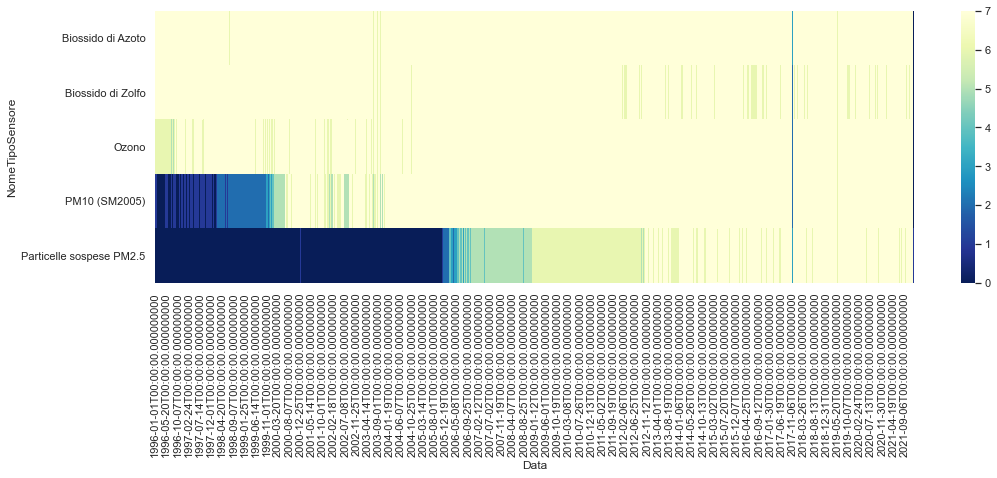

In [164]:
controllo2 = aria_sensori_zone__day_zona_tipo.groupby(['NomeTipoSensore', 'Data'], as_index = False)[['Valore_interesse']].count()
controllo2 = controllo2.pivot('NomeTipoSensore', 'Data', 'Valore_interesse')

sns.set(rc={'figure.figsize':(17,5)})
sns.heatmap(controllo2, cmap="YlGnBu_r")

### Numero medio sensori

In [165]:
controllo = aria_sensori_zone__day_zona_tipo.groupby('NomeTipoSensore', as_index = False)[['Count_sensori']].mean()
controllo

,NomeTipoSensore,Count_sensori
0,Biossido di Azoto,15.348733
1,Biossido di Zolfo,7.573804
2,Ozono,7.864996
3,PM10 (SM2005),7.810196
4,Particelle sospese PM2.5,4.005745


# Dataset per heatmap (*subset*)

## Subsetting (solo zona di milano `AGG MI`)

Tengo solo le righe di `aria_sensori_zone__day_zona_tipo` relative all'aggregato di Milano `AGG MI`

In [166]:
aria_milano = aria_sensori_zone__day_zona_tipo[
    aria_sensori_zone__day_zona_tipo['Zona'] == 'AGG MI'].drop(
        columns=['Zona']).reset_index(drop=True)

In [167]:
aria_milano

,Data,NomeTipoSensore,Valore_interesse,Count_sensori
0,1996-01-01,Biossido di Azoto,107.41000,30.0
1,1996-01-01,Biossido di Zolfo,35.47000,30.0
2,1996-01-01,Ozono,18.36875,16.0
3,1996-01-01,PM10 (SM2005),NaN,NaN
4,1996-01-01,Particelle sospese PM2.5,NaN,NaN
...,...,...,...,...
47465,2021-12-28,Biossido di Azoto,NaN,NaN
47466,2021-12-28,Biossido di Zolfo,NaN,NaN
47467,2021-12-28,Ozono,NaN,NaN
47468,2021-12-28,PM10 (SM2005),NaN,NaN


In [168]:
aria_milano.dtypes

Data                datetime64[ns]
NomeTipoSensore             object
Valore_interesse           float64
Count_sensori              float64
dtype: object

## Missing Values

### Valori mancanti per ogni coppia `Data` - `NomeTipoSensore`

<AxesSubplot:xlabel='Data', ylabel='NomeTipoSensore'>

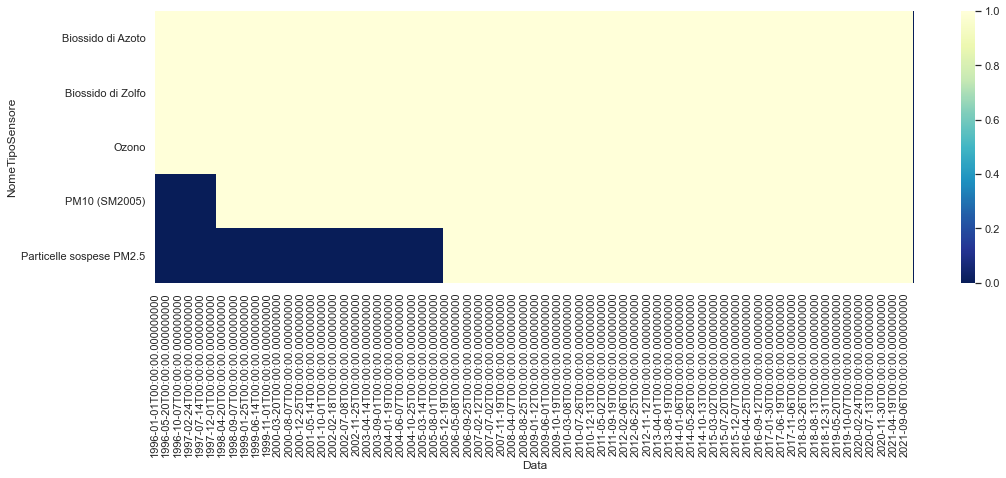

In [170]:
controllo3 = aria_milano.groupby(['NomeTipoSensore', 'Data'], as_index = False)[['Valore_interesse']].count()
controllo3 = controllo3.pivot('NomeTipoSensore', 'Data', 'Valore_interesse')

sns.set(rc={'figure.figsize':(17,5)})
sns.heatmap(controllo3, cmap="YlGnBu_r", vmin=0, vmax=1)

In [171]:
aria_milano.isna().sum()

Data                   0
NomeTipoSensore        0
Valore_interesse    4405
Count_sensori       4405
dtype: int64

### Numero medio di sensori

In [172]:
controllo4 = aria_milano.groupby(['NomeTipoSensore'], as_index = False)[['Count_sensori']].mean()
print(controllo4)

            NomeTipoSensore  Count_sensori
0         Biossido di Azoto      30.380952
1         Biossido di Zolfo      11.050258
2                     Ozono      17.187210
3             PM10 (SM2005)      11.123121
4  Particelle sospese PM2.5       4.854468


## Calcolo indice

In [173]:
aria_milano.head()

,Data,NomeTipoSensore,Valore_interesse,Count_sensori
0,1996-01-01,Biossido di Azoto,107.41000,30.0
1,1996-01-01,Biossido di Zolfo,35.47000,30.0
2,1996-01-01,Ozono,18.36875,16.0
3,1996-01-01,PM10 (SM2005),NaN,NaN
4,1996-01-01,Particelle sospese PM2.5,NaN,NaN


In [185]:
iqa_arpa = pd.DataFrame({'Biossido di Azoto': [40, 100, 200, 400, 1000, 'max 24h'],
                            'Biossido di Zolfo': [100, 200, 350, 500, 1250, 'max 24h'],
                            'Ozono': [80, 120, 180, 240, 600, 'max 24h'],
                            'PM10 (SM2005)': [20, 35, 50, 100, 1200, 'mean 24h'],
                            'Particelle sospese PM2.5': [10, 20, 25, 50, 800, 'mean 24h']}, #mettere 50 o 30?
                           index = ['Molto Buona', 'Buona', 'Accettabile', 'Scarsa', 'Molto Scarsa', 'Tipo']).transpose()
iqa_arpa

,Molto Buona,Buona,Accettabile,Scarsa,Molto Scarsa,Tipo
Biossido di Azoto,40,100,200,400,1000,max 24h
Biossido di Zolfo,100,200,350,500,1250,max 24h
Ozono,80,120,180,240,600,max 24h
PM10 (SM2005),20,35,50,100,1200,mean 24h
Particelle sospese PM2.5,10,20,25,50,800,mean 24h


In [197]:
for tipo in lista_tipi:
    conditions = [
        (aria_milano['Valore_interesse'] <= iqa_arpa.loc[tipo]['Molto Buona']),
        (aria_milano['Valore_interesse'] > iqa_arpa.loc[tipo]['Molto Buona']) & (aria_milano['Valore_interesse'] <= iqa_arpa.loc[tipo]['Buona']),
        (aria_milano['Valore_interesse'] > iqa_arpa.loc[tipo]['Buona']) & (aria_milano['Valore_interesse'] <= iqa_arpa.loc[tipo]['Accettabile']),
        (aria_milano['Valore_interesse'] > iqa_arpa.loc[tipo]['Accettabile']) & (aria_milano['Valore_interesse'] <= iqa_arpa.loc[tipo]['Scarsa']),
        (aria_milano['Valore_interesse'] > iqa_arpa.loc[tipo]['Scarsa'])
    ]
    
    values = ['Molto Buona', 'Buona', 'Accettabile', 'Scarsa', 'Molto Scarsa']
    aria_milano['Indice'] = np.select(conditions, values, default='ND')

aria_milano

,Data,NomeTipoSensore,Valore_interesse,Count_sensori,Indice
0,1996-01-01,Biossido di Azoto,107.41000,30.0,Molto Scarsa
1,1996-01-01,Biossido di Zolfo,35.47000,30.0,Scarsa
2,1996-01-01,Ozono,18.36875,16.0,Buona
3,1996-01-01,PM10 (SM2005),NaN,NaN,ND
4,1996-01-01,Particelle sospese PM2.5,NaN,NaN,ND
...,...,...,...,...,...
47465,2021-12-28,Biossido di Azoto,NaN,NaN,ND
47466,2021-12-28,Biossido di Zolfo,NaN,NaN,ND
47467,2021-12-28,Ozono,NaN,NaN,ND
47468,2021-12-28,PM10 (SM2005),NaN,NaN,ND


## Esportazione

In [198]:
aria_milano.to_csv(f'{path}data_viz/aria_milano_96_21.csv')

# Dataset per line chart

## Campi calcolati

### Media mobile 7 giorni

- In fase di lettura dei csv prendere qualche giorno prima e qualche giorno dopo degli anni considerati cosi da avere valori attendibili agli estremi!! (in fase di importazione)
- La calcolo su 7 giorni e setto il parametro del numero minimo di valori non nulli da avere per calcolare la media a 3
- L'avevo calcolata anche sui 21 giorni ma é eccessiva perché genera degli andamenti che non sono presenti nei dati

In [76]:
ROLL_WINDOW = 7   #media mobile 7 giorni

mean7gg = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con la medie
std7gg = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con lo std

for zona in lista_zone:
    for tipo in lista_tipi:

        temp1 = aria_sensori_zone__day_zona_tipo[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == tipo) & (aria_sensori_zone__day_zona_tipo['Zona'] == zona)]['Valore_MEAN_day_zona_tipo']\
                .rolling(window=ROLL_WINDOW, center = True, min_periods = 3)\
                .mean()
        temp2 = aria_sensori_zone__day_zona_tipo[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == tipo) & (aria_sensori_zone__day_zona_tipo['Zona'] == zona)]['Valore_STD_day_zona_tipo']\
                .rolling(window=ROLL_WINDOW, center = True, min_periods = 3)\
                .mean()
        mean7gg = mean7gg.append(temp1)
        std7gg = std7gg.append(temp2)
        
aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, mean7gg.rename('Valore_ROLLMEAN7_day_zona_tipo'), left_index=True, right_index=True)
aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, std7gg.rename('Valore_ROLLSTD7_day_zona_tipo'), left_index=True, right_index=True)

Stampo una coppia `NomeTipoSensore` e `Zona` specifica come esempio

In [77]:
aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')].head()

,Data,Zona,NomeTipoSensore,Valore_MEAN_day_zona_tipo,Valore_COUNT_day_zona_tipo,Valore_STD_day_zona_tipo,Valore_ROLLMEAN7_day_zona_tipo,Valore_ROLLSTD7_day_zona_tipo
5,1996-01-01,A,PM10 (SM2005),40.0,1.0,NaN,NaN,NaN
68,1996-01-02,A,PM10 (SM2005),37.0,1.0,NaN,37.333333,NaN
131,1996-01-03,A,PM10 (SM2005),NaN,NaN,NaN,37.750000,NaN
194,1996-01-04,A,PM10 (SM2005),NaN,NaN,NaN,33.800000,NaN
257,1996-01-05,A,PM10 (SM2005),35.0,1.0,NaN,32.000000,NaN


- Risolve quasi completamente il problema di qualche media mancante

In [78]:
print(sum(aria_sensori_zone__day_zona_tipo.Valore_MEAN_day_zona_tipo.isna()), 'Valori mancanti media giornaliera')
print(sum(aria_sensori_zone__day_zona_tipo.Valore_ROLLMEAN7_day_zona_tipo.isna()), ' Valori mancanti media mobile 7gg')

106355 Valori mancanti media giornaliera
103319  Valori mancanti media mobile 7gg


#### Plot esempio con media giornaliera  media mobile 7gg (PM10 zona A)

<AxesSubplot:xlabel='Data', ylabel='Valore_MEAN_day_zona_tipo'>

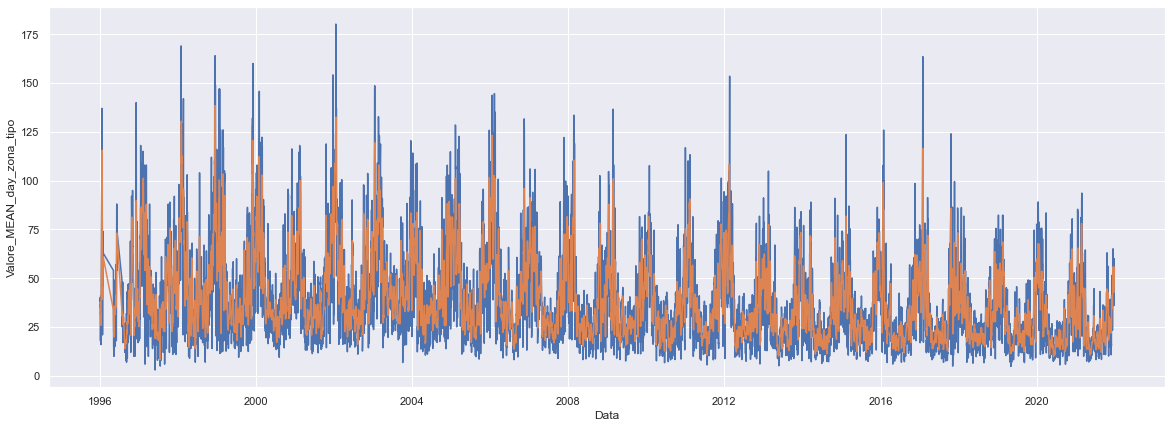

In [79]:
sns.set(rc={'figure.figsize':(20,7)})
sns.lineplot(x="Data", y='Valore_MEAN_day_zona_tipo', data=aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')])
sns.lineplot(x="Data", y='Valore_ROLLMEAN7_day_zona_tipo', data=aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')])

### Normalizzazione grandezze rispetto ai limiti

#### Definizione limiti

##### Limiti del sito ARPA Lombardia (WHO 2005)

É un mix tra massimi su medie orarie, 8 ore, giornaliere e annuali

In [80]:
limitiARPA_vari = pd.DataFrame({'Benzene': np.NaN,
                            'Biossido di Azoto': 200,
                            'Biossido di Zolfo': 350,
                            'Monossido di Carbonio': np.NaN,
                            'Ossidi di Azoto': np.NaN,
                            'Ozono': 180,
                            'PM10 (SM2005)': 50,
                            'Particelle sospese PM2.5': 25},
                           index = ['Limite']).transpose()
limitiARPA_vari

,Limite
Benzene,NaN
Biossido di Azoto,200.0
Biossido di Zolfo,350.0
Monossido di Carbonio,NaN
Ossidi di Azoto,NaN
Ozono,180.0
PM10 (SM2005),50.0
Particelle sospese PM2.5,25.0


##### Nuovi limiti WHO sulle 24h del 2021

- Nuove guidelines del **22 September 2021** dalla WHO [qui](https://www.who.int/news/item/22-09-2021-new-who-global-air-quality-guidelines-aim-to-save-millions-of-lives-from-air-pollution) ad aggiornare le guidelines del 2005 
- The updated WHO Global Air Quality Guidelines (AQGs) provide recommendations on air quality guideline levels as well as interim targets for **six key air pollutants**. The guidelines focus on so-called classical pollutants, particulate matter (PM₂.₅ and PM₁₀), ozone (O₃), nitrogen dioxide (NO₂), sulfur dioxide (SO₂) and carbon monoxide (CO). When action is taken to reduce these classical pollutants it also has an impact on other pollutants. [qui](https://www.who.int/news-room/questions-and-answers/item/who-global-air-quality-guidelines)
- Nuovi limiti SOLO sulle 24 ore (Recommended AQG levels), dati ricavati da [qui](https://apps.who.int/iris/bitstream/handle/10665/345334/9789240034433-eng.pdf)
- I limiti sulle 24h sono quelli per ridurre i short-term exposure effects (da mettere nel titolo/ context)
- Le unitá di misura rispecchiano quelle dei sensori
- Puo' essere utile calcoare per ogni inquinante anche una dose? (Dose di inquinante = concentrazione normalizzata *  numero giorni) Edit: forse no perché non ha senso con le quantita normalizzate

In [81]:
limitiWHO_24h = pd.DataFrame({'Benzene': np.NaN,
                               'Biossido di Azoto': 25, #ug/m3
                               'Biossido di Zolfo': 40, #ug/m3
                               'Monossido di Carbonio': 4, #mg/m3
                               'Ossidi di Azoto': np.NaN,
                               'Ozono': np.NaN, #ci sarebbe un valore anche per l'ozono ma é sulle 8 ore
                               'PM10 (SM2005)': 45, #ug/m3
                               'Particelle sospese PM2.5': 15 #ug/m3
                             }, index = ['Limite']).transpose()
limitiWHO_24h

,Limite
Benzene,NaN
Biossido di Azoto,25.0
Biossido di Zolfo,40.0
Monossido di Carbonio,4.0
Ossidi di Azoto,NaN
Ozono,NaN
PM10 (SM2005),45.0
Particelle sospese PM2.5,15.0


#### Aggiungo colonne al dataframe con le grandezze scalate rispetto al loro limite sulle 24h

Scalo la `ROLLMEAN7` e la `ROLLSTD7`

In [82]:
limiti = limitiWHO_24h #scegliere i limiti da usare

mean7gg_norm = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con la media normalizzata
std7gg_norm = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con lo std normalizzato

for tipo in lista_tipi:
    temp1 = aria_sensori_zone__day_zona_tipo[aria_sensori_zone__day_zona_tipo.NomeTipoSensore == tipo]['Valore_ROLLMEAN7_day_zona_tipo'] / limiti.loc[tipo, 'Limite'] * 100
    temp2 = aria_sensori_zone__day_zona_tipo[aria_sensori_zone__day_zona_tipo.NomeTipoSensore == tipo]['Valore_ROLLSTD7_day_zona_tipo'] / limiti.loc[tipo, 'Limite'] * 100
    mean7gg_norm = mean7gg_norm.append(temp1)
    std7gg_norm = std7gg_norm.append(temp2)

aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, mean7gg_norm.rename('Valore_ROLLMEAN7_day_zona_tipo_NORM'), left_index=True, right_index=True)
aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, std7gg_norm.rename('Valore_ROLLSTD7_day_zona_tipo_NORM'), left_index=True, right_index=True)

#escludo righe appartenti ai sensori di cui non ho i limiti
aria_sensori_zone__day_zona_tipo.drop(aria_sensori_zone__day_zona_tipo[aria_sensori_zone__day_zona_tipo['NomeTipoSensore'].isin(limiti[limiti['Limite'].isna()].index)].index, inplace = True)
aria_sensori_zone__day_zona_tipo.reset_index(drop=True, inplace=True)
aria_sensori_zone__day_zona_tipo.head()

KeyError: 'Particolato Totale Sospeso'

## Esportazione

### Droppo le colonne inutili

In [ ]:
dataset_norm = aria_sensori_zone__day_zona_tipo.drop(['Valore_MEAN_day_zona_tipo', 'Valore_COUNT_day_zona_tipo', 'Valore_STD_day_zona_tipo', 'Valore_ROLLSTD7_day_zona_tipo'], axis = 1)
dataset_norm.head()

### Esporto csv

In [ ]:
#dataset_norm.to_csv('dataset_norm.csv')